In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000119A6CE72B0>

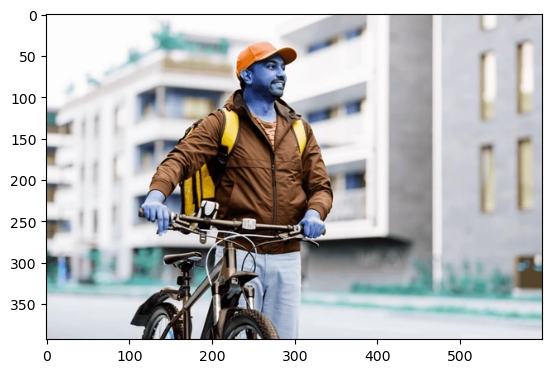

In [9]:
img=cv2.imread('boy.jpg')
plt.imshow(img)

In [10]:
ClassIndex, confidence, bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[ 2  1 27]


In [12]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0,255,0), thickness=3)

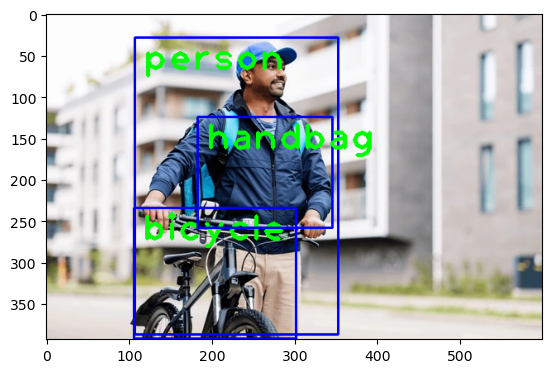

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
import cv2

cap = cv2.VideoCapture('street.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0,255,0), thickness=3)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


[3 1 3 1 3 1 1 1 3 1 1]
[3 1 3 1 1 3 1 1 3 1 1]
[3 1 1 1 1 3 3 3 1 1 1]
[3 1 1 1 3 3 3 1 1 1 1]
[1 1 1 3 3 3 1 1 1 3 1]
[1 1 3 1 3 1 3 1 1 3 1]
[3 1 3 1 1 3 1 1 1 1 3]
[3 1 3 1 1 3 1 1 3]
[1 3 1 1 3 3 1 1 3]
[1 3 1 1 3 1 3 3 1 1]
[1 3 1 1 3 3 1 3 1 1 1 1]
[3 1 1 1 1 3 3 1 1 3]
[3 1 1 1 1 3 3 1 1 1 3 1 1]
[1 3 1 1 1 3 3 1 1 3 1 1]
[1 1 3 1 1 3 1 3 1 3 1 1 1]
[1 1 3 1 1 3 3 1 3 1 1 1]
[1 1 1 3 3 1 3 1 3 1 1]
[1 1 1 3 1 1 3 3 3 1 1]
[1 1 1 1 1 3 3 3 3 1 1]
[1 1 1 1 1 3 3 3 3 1 1]
[ 1  1  1  1  3  1  3  3  3  1 41  1  1]
[1 1 3 1 1 3 1 3 3 1 1 1]
[1 1 3 3 1 3 1 3 1 1 1 1 3]
[1 1 3 3 1 1 3 1 3 1 1]
[1 1 3 3 1 3 3 1 1 1 1 1]
[1 1 3 3 3 1 3 1 1 1 1 1]
[1 1 3 3 1 1 3 1 1 3 1 1]
[1 3 1 3 1 1 1 3 3 1 1 1 3]
[1 1 3 3 1 1 1 3 1 3 1 1 3]
[1 3 1 3 1 1 1 1 3 3 1 1]
[1 1 3 3 1 1 1 1 3 3 1 1]
[3 1 1 3 1 1 1 1 3 1 3 1 1]
[1 3 1 3 1 1 3 1 1 3 3 1]
[1 3 1 3 1 1 1 3 3 1 1 3]
[1 3 3 1 1 1 3 3 1 1 1 3 1 1]
[1 1 3 3 1 1 1 3 1 3 1 1 1 3]
[1 3 1 3 1 1 3 1 1 1 1 3 1 1]
[1 3 3 1 1 1 3 1 1 1 1 3]
[1 3 3 1 1 1 3 1 

[ 1  3  1  1  1  3  1  3 31  1  8  1  1]
[ 3  1  1  1  1  3  1  8  3  1 31]
[ 3  1  1  1  3  1  8  1  3  1 31  3]
[ 1  3  1  1  1  8  3  1  1  3  3 31  1]
[1 3 1 3 1 1 1 8 1 3 1]
[1 3 1 8 1 1 1 1 3 1 3 1]
[1 3 1 1 1 1 1 3 8 1 3]
[1 3 1 1 1 8 1 1 3 1 3]
[1 1 1 1 3 8 1 1 1 3 3 1]
[1 1 1 3 1 1 3 8 1 3 1 1]
[1 1 1 3 1 1 8 3 1 3 1 1]
[1 1 1 1 3 1 8 3 1 1 3 1]
[1 1 1 1 3 1 1 3 8 1 3 3]
[1 1 1 1 1 3 3 1 8 3 3]
[1 1 1 3 1 3 8 1 1 3 3]
[1 1 1 3 1 1 8 3 1 3 3]
[1 1 1 1 3 1 1 8 3 1 3 1 3]
[1 1 1 1 3 3 8 1 1 3 3]
[ 1  1  1  1  3  3  1  8  1  3  3 41  1]
[ 1  1  1  3  1 41  1  3  8  1  3  3  1]
[ 1  1  1  3  1  1  3 41  1  1  3  8  3]
[ 1  1  1  1  3  1  8  1  3  1  1 41  3  3]
[ 1  1  1  3  1  8  1  1  1  3 41  3  3  1]
[ 1  1  1  3 41  3  8  1  3  3  1  1  1]
[ 1  1  3  1 41  1  3  3  8  3  1  1  1]
[ 3  1  1 41  1  8  3  1  3  3  1  1  1]
[ 3  1  1 41  1  3  3  3  1  8  1  1  1]
[ 3 41  1  1  1  3  3  1  1  1  1  3  1 41  1]
[ 3 41  1  1  1  1  1  3  3  1  1  8  1 41  3]
[ 1  3 41  1  1  1  3  3

KeyboardInterrupt: 